In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from csv import reader
import gc

In [3]:
#sourced from Bishop 2008 paper
#Reflectance and emission spectroscopy study of four groups of phyllosilicates: smectites, kaolinite-serpentines, chlorites and micas
class BishopPhyllosilicateSample:
    ##create constuctor i.e. _init_ function for the class
    def __init__(self,sampleID,paper,phyllosilicateType,phyllosilicateSpecies,bandCentres):
        #set variable to hold the sample id
        self.sampleID=sampleID
        #set variable to hold the source i.e. paper
        self.paper=paper
        #set variable to hold the mineral type
        self.phyllosilicateType=phyllosilicateType
        #set varibale to hold the mineral species
        self.phyllosilicateSpecies=phyllosilicateSpecies
        #set variable to hold the band centres
        self.bandCentres=bandCentres

In [4]:
#read the csv file
rows=[]
for row in reader(open("G:/Phyllosilicate absorption features - Sheet1.csv")):
    rows.append(row)


In [5]:
#create an array to hold the samples
allPhyllosilicateBishopSamples=[]
for i in range(len(rows)):
    #check if the row is a sample
    if len(rows[i][0])>0 and rows[i][0]!='Mineral Group':
        #get all band centres
        bandCentres=[]
        for j in range(2,11):
            if rows[i][j]!='':
                bandCentres.append((float)(rows[i][j]))
        #sort the list of band Centres
        bandCentres=np.array(sorted(bandCentres,key=float))
        #create an object
        currentSample=BishopPhyllosilicateSample(i,
                                          "Bishop 2008",
                                          rows[i][0],
                                          rows[i][1],
                                          np.array(sorted(bandCentres)))
        #append to list of all sample
        allPhyllosilicateBishopSamples.append(currentSample)
#delete tand collect garbage
del rows
noOfGarbageItems=gc.collect()

In [6]:
#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.47-2.56
lowerBound25=2.47
upperBound25=2.67

#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save bishop samples
bishopPhyllosilicate23BandCentre=[]
bishopPhyllosilicate25BandCentre=[]
for i in allPhyllosilicateBishopSamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        bandCentre23=bandCentres[feature23Index]
        feature25Index=np.where(np.logical_and(bandCentres<upperBound25,
                                                         bandCentres>=lowerBound25))[0][0]
        bandCentre25=bandCentres[feature25Index]
        bishopPhyllosilicate23BandCentre.append(bandCentre23)
        bishopPhyllosilicate25BandCentre.append(bandCentre25)
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)
        

In [7]:
#print all phyllosilicate samples that weren't plotted
print("samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.phyllosilicateSpecies}--\t\t\t\t--{i.phyllosilicateType}--\t\t\t\t--{i.bandCentres}")

samples not plotted are:-


Montmorillonite--				--Montmorillonite--				--[2.217 2.44 ]
Zinnawaldite--				--Mica--				--[2.201 2.255 2.35 ]
Biotite--				--Mica--				--[2.259 2.366]


In [8]:
#print all phyllosilicate samples that weren't plotted
print("samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.phyllosilicateSpecies}--\t\t\t\t--{i.phyllosilicateType}--\t\t\t\t--{i.bandCentres}")

samples plotted are:-


Fe-smectite--				--Smectite--				--[2.236 2.288 2.405 2.496]
Nontronite--				--Nontronite--				--[2.288 2.407 2.502]
Kaolinite--				--Kaolinite--				--[2.166 2.211 2.45  2.5  ]
Chrysotile--				--Kaolinite-Serpentine--				--[2.333 2.337 2.51 ]
Clinochlore--				--Chlorite--				--[2.248 2.3   2.331 2.47 ]
Chamosite--				--Chlorite--				--[2.261 2.358 2.51 ]
Celadonite--				--Mica--				--[2.257 2.302 2.348 2.47 ]
Glauconite--				--Mica--				--[2.317 2.366 2.48  2.51 ]


In [9]:
#delete all the things not neeeded now
del nonPlottedPhyllosilicateSamples
del plottedPhyllosilicateSamples
del bandCentre25
del bandCentre23
del feature23Index
del feature25Index
del allPhyllosilicateBishopSamples
del bandCentres
del currentSample
#count samples collected
collectedItems=gc.collect()
print(collectedItems)

0


In [10]:
#create a class to hold the data
class CarbonateSample:
    #create constuctor i.e. _init_ function for the class
    def __init__(self,sampleID,paper,carbonateType,bandCentre23,bandCentre25,interBandGap,outlier):
        #set variable to hold the sample id
        self.sampleID=sampleID
        #set variable to hold the source i.e. paper
        self.paper=paper
        #set variable to hold the mineral type
        self.carbonateType=carbonateType
        #set variable to hold the 2.3 micron band centres
        self.bandCentre23=bandCentre23
        #set variable to hold the 2.5 micron band centres
        self.bandCentre25=bandCentre25
        #set variable to hold the inter band gap
        self.interBandGap=interBandGap
        ##set variable to hold if sample is an outlier
        self.outlier=outlier

In [11]:
#read the csv file
rows=[]
for row in reader(open("G:/Carbonate absorption features - Carbonate absorption features.csv")):
        if row[0]!='' and row[3]!='' and row[2]!='' and row[1]!='' and row[0]!='Mineral Name':
            rows.append(row)


In [12]:
#create an array to hold the 
allBishopnGaffeyCarbonateSamples=[]
for i in range(len(rows)):
    #create an object out of the currentsample
    paper=""
    if i<20:
        paper="Gaffey"
    else:
        paper="Bishop"
    outlier=0
    if rows[i][12]!='':
        outlier=1
    currentSample=CarbonateSample(rows[i][1],
                                  paper,
                                  rows[i][0],
                                  (float)(rows[i][3]),
                                  (float)(rows[i][2]),
                                  (float)(rows[i][10]),
                                 outlier)
    allBishopnGaffeyCarbonateSamples.append(currentSample)
del rows
collectedSamples=gc.collect()

In [13]:
#get all types of carbonates
co3Types=[]
#iterate over co3Types and get all unique types
for i in allBishopnGaffeyCarbonateSamples:
    #add the type to the list
    co3Types.append(i.carbonateType)
#retain uniques
co3Types=set(co3Types)

In [14]:
#specifySamples to ignore
ignoreIDs=["JB833","115O2","11503"]

In [15]:
#save all gaffey carbonate samples

#lists to save gaffey samples
gaffeyCarbonate23BandCentre=[]
gaffeyCarbonate25BandCentre=[]
gaffeySamples=[]
#iterate over all samples and save the gaffey samples
for i in allBishopnGaffeyCarbonateSamples:
    #check if the sample contains Ca, Fe or Mg. If not, skip
    if not(re.search("Ca",i.carbonateType) or re.search("Fe",i.carbonateType) or re.search("Mg",i.carbonateType)):
        continue
    if i.sampleID in ignoreIDs or i.paper=="Bishop":
        continue
    gaffeyCarbonate23BandCentre.append(i.bandCentre23)
    gaffeyCarbonate25BandCentre.append(i.bandCentre25)
    gaffeySamples.append(i)

In [16]:
#save all bishop carbonate samples

#lists to save bishop samples
bishopCarbonate23BandCentre=[]
bishopCarbonate25BandCentre=[]
bishopSamples=[]
#iterate over all samples and save the gaffey samples
for i in allBishopnGaffeyCarbonateSamples:
    #check if the sample contains Ca, Fe or Mg. If not, skip
    if not(re.search("Ca",i.carbonateType) or re.search("Fe",i.carbonateType) or re.search("Mg",i.carbonateType)):
        continue
    #check if the ID is to be ignored
    if i.sampleID in ignoreIDs or i.paper=="Gaffey":
        continue
    bishopCarbonate23BandCentre.append(i.bandCentre23)
    bishopCarbonate25BandCentre.append(i.bandCentre25)
    bishopSamples.append(i)

In [17]:
#print all gaffey samples
print("All Gaffey Carbonate samples\n\n:-")
for i in gaffeySamples:
    print(f"{i.paper}--\t--{i.sampleID}--\t--{i.carbonateType}--\t--{i.bandCentre23}--\t--{i.bandCentre25}")

All Gaffey Carbonate samples

:-
Gaffey--	--2502--	--Magnesite (Mg)--	--2.3--	--2.5
Gaffey--	--2506--	--Magnesite (Mg)--	--2.298--	--2.497
Gaffey--	--6509--	--Dolomite (Ca, Fe, Mg)--	--2.32--	--2.516
Gaffey--	--6514--	--Dolomite (Ca, Fe, Mg)--	--2.319--	--2.516
Gaffey--	--6515b*--	--Siderite (Fe)--	--2.329--	--2.528
Gaffey--	--9504--	--Siderite (Fe)--	--2.321--	--2.525
Gaffey--	--1531--	--Calcite (Ca)--	--2.333--	--2.535
Gaffey--	--1542--	--Calcite (Ca)--	--2.34--	--2.541
Gaffey--	--10524--	--Aragonite (Ca)--	--2.331--	--2.535
Gaffey--	--1O53O--	--Aragonite (Ca)--	--2.332--	--2.532
Gaffey--	--JB0946E--	--Magnesite (Mg)--	--2.301--	--2.503
Gaffey--	--JB1161B--	--Magnesite (Mg)--	--2.301--	--2.501
Gaffey--	--JB1162B--	--Mg-Siderite (Fe/Mg)--	--2.319--	--2.522
Gaffey--	--JB1462D--	--Siderite (Fe)--	--2.32--	--2.525
Gaffey--	--JB1463D--	--Siderite (Fe)--	--2.333--	--2.534
Gaffey--	--JB1163B--	--Siderite (Fe)--	--2.334--	--2.538
Gaffey--	--JB1457D--	--Calcite (Ca)--	--2.34--	--2.537
Gaffey-

In [18]:
#print all bishop samples
print("All Bishop Carbonate samples\n\n:-")
for i in bishopSamples:
    print(f"{i.paper}--\t--{i.sampleID}--\t--{i.carbonateType}--\t--{i.bandCentre23}--\t--{i.bandCentre25}")

All Bishop Carbonate samples

:-
Bishop--	--JB1460D--	--Calcite (Ca)--	--2.338--	--2.534
Bishop--	--HS194B--	--Calcite (Ca)--	--2.34--	--2.536
Bishop--	--HS48B--	--Calcite (Ca)--	--2.338--	--2.535
Bishop--	--JB552--	--Calcite (Ca)--	--2.342--	--2.539
Bishop--	--JB0779--	--Dolomite (Ca, Fe, Mg)--	--2.322--	--2.516
Bishop--	--JB1461D--	--Dolomite (Ca, Fe, Mg):--	--2.324--	--2.518
Bishop--	--HS102B--	--Dolomite (Ca, Fe, Mg):--	--2.325--	--2.514
Bishop--	--NMNH R12596--	--Dolomite (Ca, Fe, Mg):--	--2.324--	--2.515
Bishop--	--Salisbury/Vergo 3C--	--Dolomite (Ca, Fe, Mg):--	--2.322--	--2.515
Bishop--	--JB829--	--Fe/Mg/Ca-Carbonate--	--2.298--	--2.514
Bishop--	--JB832--	--Fe/Mg/Ca-Carbonate--	--2.302--	--2.507
Bishop--	--JB0778--	--Ankerite (Ca, Fe, Mg, Mn)--	--2.314--	--2.531
Bishop--	--JB0830--	--Ankerite (Ca, Fe, Mg, Mn)--	--2.306--	--2.507
Bishop--	--JB0831--	--Ankerite (Ca, Fe, Mg, Mn)--	--2.302--	--2.507
Bishop--	--JB1459D--	--Aragonite (Ca)--	--2.318--	--2.522
Bishop--	--JB1640D--	--Ar

In [19]:
#remove used data
del bishopSamples
del gaffeySamples
del allBishopnGaffeyCarbonateSamples
del co3Types
del ignoreIDs
collectedItems=gc.collect()

In [20]:
#read the phyllosilicate informtion
phyllosilicateMICASamples=pd.read_excel("G:/MICA absorption features.xlsx",sheet_name="Phyllosilicates")
#read the carbonate information
carbonateMICASamples=pd.read_excel("G:/MICA absorption features.xlsx",sheet_name="Carbonates")


In [21]:
#define class for MICA mineral
class MICASample:
    ##create constuctor i.e. _init_ function for the class
    def __init__(self,sampleSource,mineralSpecies,mineralGroup,sampleType,bandCentres):
        #set variable to hold the sample source
        self.sampleSource=sampleSource
        #set variable to hold the mineral species
        self.mineralSpecies=mineralSpecies
        #set variable to hold the mineral group
        self.mineralGroup=mineralGroup
        #set variable to hold the type of Sample CRISM or library spectra
        self.sampleType=sampleType
        #set variable to hold the band centres
        self.bandCentres=bandCentres

In [22]:
#create a list to hold all carbonate MICA samples
allCarbonateMICASamples=[]
#iterate through carbonate dataframe and add samples to the list
for index, row in carbonateMICASamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(4,10):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(row[i])
    #create an object
    currentSample=MICASample(row['Sample No/Image ID'],
                             row['Mineral'],
                             'Carbonate',
                             row['CRISM or Library'],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allCarbonateMICASamples.append(currentSample)

#create a list to hold all carbonate MICA samples
allPhyllosilicateMICASamples=[]
#iterate through carbonate dataframe and add samples to the list
for index, row in phyllosilicateMICASamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(4,10):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(row[i])
    #create an object
    currentSample=MICASample(row['Sample No/Image ID'],
                             row['Mineral'],
                             'Phyllosilicate',
                             row['CRISM or Library'],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allPhyllosilicateMICASamples.append(currentSample)


In [23]:
#iterate through all phyllosilicate MICA samples
#record the samples that cannot be plotted i.e do not have 2.3 and 2.5 micron absorption features
#save the library and non library samples seperately

#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.47-2.56
lowerBound25=2.47
upperBound25=2.67

#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save library samples
libraryPhyllosilicate23BandCentre=[]
libraryPhyllosilicate25BandCentre=[]

#lists to save CRISM samples
crismPhyllosilicate23BandCentre=[]
crismPhyllosilicate25BandCentre=[]

for i in allPhyllosilicateMICASamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        bandCentre23=bandCentres[np.where(np.logical_and(bandCentres<=upperBound23,bandCentres>=lowerBound23))[0]][0]
        bandCentre25=bandCentres[np.where(np.logical_and(bandCentres<=upperBound25,bandCentres>=lowerBound25))[0]][0]
        if i.sampleType=="CRISM":
            crismPhyllosilicate23BandCentre.append(bandCentre23)
            crismPhyllosilicate25BandCentre.append(bandCentre25)
        else:
            libraryPhyllosilicate23BandCentre.append(bandCentre23)
            libraryPhyllosilicate25BandCentre.append(bandCentre25)
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)

In [24]:
#iterate through all carbonate MICA samples
#record the samples that cannot be plotted i.e do not have 2.3 and 2.5 micron absorption features
#save the library and non library samples seperately

#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.47-2.56
lowerBound25=2.47
upperBound25=2.67

#list to hold carbonate samples that weren't plotted
nonPlottedCarbonateSamples=[]
#list to hold carbonate samples that were plotted
plottedCarbonateSamples=[]

#lists to save library samples
libraryCarbonate23BandCentre=[]
libraryCarbonate25BandCentre=[]

#lists to save CRISM samples
crismCarbonate23BandCentre=[]
crismCarbonate25BandCentre=[]

for i in allCarbonateMICASamples:
    
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        bandCentre23=bandCentres[np.where(np.logical_and(bandCentres<=upperBound23,bandCentres>=lowerBound23))[0]][0]
        bandCentre25=bandCentres[np.where(np.logical_and(bandCentres<=upperBound25,bandCentres>lowerBound25))[0]][0]
        if i.sampleType=="CRISM":
            crismCarbonate23BandCentre.append(bandCentre23)
            crismCarbonate25BandCentre.append(bandCentre25)
        else:
            libraryCarbonate23BandCentre.append(bandCentre23)
            libraryCarbonate25BandCentre.append(bandCentre25)
        plottedCarbonateSamples.append(i)
    except:
        nonPlottedCarbonateSamples.append(i)
        

In [25]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples not plotted are:-


Al-Smectite--				--CRISM--				--[1.91 2.2 ]
Al-Smectite--				--Library--				--[1.91 2.21]
Illite/Muscovite--				--CRISM--				--[1.93 2.21 2.35 2.45]
Illite/Muscovite--				--Library--				--[1.91 2.22 2.35 2.45]
Kaolinite--				--CRISM--				--[1.41 1.92 2.16 2.21 2.38]
Kaolinite--				--Library--				--[1.41 1.92 2.16 2.21 2.32 2.39]
Margarite--				--Library--				--[2.   2.21 2.26 2.34 2.44]
Mg-smectite--				--CRISM--				--[1.92 2.31 2.39]
Mg-smectite--				--Library--				--[1.91 2.32 2.39]


In [26]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples plotted are:-


Chlorite--				--CRISM--				--[1.92 2.   2.25 2.35 2.53]
Chlorite--				--Library--				--[1.99 2.25 2.33 2.48]
Fe-Smectite--				--CRISM--				--[1.91 2.29 2.39 2.52]
Fe-Smectite--				--Library--				--[1.9  2.23 2.28 2.41 2.5 ]
Margarite--				--CRISM--				--[2.   2.2  2.25 2.35 2.47]
Serpentine--				--CRISM--				--[1.96 2.11 2.32 2.44 2.51 2.55]
Serpentine--				--Library--				--[1.96 2.12 2.33 2.44 2.51 5.56]
Talc--				--CRISM--				--[1.91 2.24 2.31 2.39 2.47]
Talc--				--Library--				--[1.91 2.23 2.32 2.39 2.47]


In [27]:
#print all carboante samples that weren't plotted
print("carbonate samples not plotted are:-\n\n")
for i in nonPlottedCarbonateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

carbonate samples not plotted are:-




In [28]:
#print all carbonate samples that were plotted
print("carbonate samples plotted are:-\n\n")
for i in plottedCarbonateSamples:
    print(f"{i.mineralSpecies}--\t\t\t\t--{i.sampleType}--\t\t\t\t--{i.bandCentres}")

carbonate samples plotted are:-


Fe/Ca carbonate--				--CRISM--				--[2.34 2.53 3.48 3.84]
Fe/Ca carbonate--				--Library--				--[2.34 2.53 2.79 3.35 3.48 3.85]
Mg Carbonate--				--CRISM--				--[2.31 2.51 3.46 3.84]
Mg Carbonate--				--Library--				--[2.31 2.5  3.27 3.43 3.8 ]


In [29]:
#collect the garbage
del phyllosilicateMICASamples
del carbonateMICASamples
del nonPlottedCarbonateSamples
del plottedCarbonateSamples
del plottedPhyllosilicateSamples
del nonPlottedPhyllosilicateSamples
collectedItems=gc.collect()

In [30]:
#read the phyllosilicate informtion
postSerpentineSamples=pd.read_excel("G:/Serpentine Post 2000.xlsx",sheet_name="Serpentine")

In [31]:
#define a class to hold Post 2000 samples
class PostSample:
    #create a constructor
    def __init__(self,sampleName,mineral,bandCentres):
        #set variable to hold sample name
        self.sampleName=sampleName
        #set variable to hold which mineral
        self.mineral=mineral
        #set variable to hold the bandCentres
        self.bandCentres=bandCentres

In [32]:
#create a list to hold all Post serpentine samples
allPostSerpentineSamples=[]
#iterate through serpentine dataframe and add samples to the list
for index, row in postSerpentineSamples.iterrows():
    #get the band centres
    bandCentres=[]
    for i in range(2,16):
        if row[i]==row[i]:#ensure the number is not NaN
            bandCentres.append(10000000/(row[i]*1000))
    #create an object
    currentSample=PostSample(row['Sample Name'],
                             row['Mineral '],
                             np.array(sorted(bandCentres)))
    #add the object to the list of samples
    allPostSerpentineSamples.append(currentSample)

In [33]:
#set bounds for the 2.3 band centre i.e the first band centre in the range 2.27-2.36
lowerBound23=2.27
upperBound23=2.47

#set bounds for the 2.5 band centre i.e the first band centre in the range 2.27-2.36
lowerBound25=2.47
upperBound25=2.67

#list to hold phyllosilicate samples that weren't plotted
nonPlottedPhyllosilicateSamples=[]
#list to hold phyllosilicate samples that were plotted
plottedPhyllosilicateSamples=[]

#lists to save band centres
postPhyllosilicate23BandCentre=[]
postPhyllosilicate25BandCentre=[]

for i in allPostSerpentineSamples:
    #get the band centres
    bandCentres=i.bandCentres
    #get the 2.3 and 2.5 micron band centres, if avialable check if crism or library spectra and append to that list
    try:
        feature23Index=np.where(np.logical_and(bandCentres<=upperBound23,
                                                         bandCentres>=lowerBound23))[0][0]
        feature25Index=np.where(np.logical_and(bandCentres<=upperBound25,
                                                         bandCentres>=lowerBound25))[0][0]
        postPhyllosilicate23BandCentre.append(bandCentres[feature23Index])
        postPhyllosilicate25BandCentre.append(bandCentres[feature25Index])
        plottedPhyllosilicateSamples.append(i)
    except:
        nonPlottedPhyllosilicateSamples.append(i)

In [34]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples not plotted are:-\n\n")
for i in nonPlottedPhyllosilicateSamples:
    print(f"{i.sampleName}--\t\t\t\t--{i.mineral}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples not plotted are:-


Clinochrysotile 22--				--Clinochrysotile--				--[2.31696015 2.32450023 2.33754091 2.37416904 2.37812128 2.39750659
 2.42189392 2.4348673  2.45098039 2.70929287 2.73897562]


In [35]:
#print all phyllosilicate samples that weren't plotted
print("Phyllosilicate samples plotted are:-\n\n")
for i in plottedPhyllosilicateSamples:
    print(f"{i.sampleName}--\t\t\t\t--{i.mineral}--\t\t\t\t--{i.bandCentres}")

Phyllosilicate samples plotted are:-


Clinochrysotile 23--				--Clinochrysotile--				--[2.3174971  2.32504069 2.33808744 2.38095238 2.40269101 2.42895312
 2.47954376 2.51256281 2.58131131 2.70709258 2.73972603]
Clinochrysotile 95--				--Clinochrysotile--				--[2.3174971  2.3255814  2.33754091 2.37135404 2.37755587 2.39463602
 2.43309002 2.44200244 2.48015873 2.50815149 2.55493102 2.70562771
 2.71296799 2.74197971]
Clinochrysotile 96--				--Clinochrysotile--				--[2.32504069 2.33590283 2.37473284 2.40096038 2.41954996 2.4378352
 2.46974562 2.51004016 2.55754476 2.70855905 2.71370421 2.73897562]
Lizardite 11--				--Lizardite--				--[2.32396003 2.33699462 2.38265428 2.44021474 2.4600246  2.50941029
 2.55950857 2.70855905 2.71370421 2.73747605]
Lizardite 51--				--Lizardite--				--[2.31696015 2.32396003 2.33535731 2.37868696 2.44678248 2.51635632
 2.5733402  2.7100271  2.7203482  2.73822563]
Lizardite-Orthochrysotile 42--				--Lizardite-Orthochrysotile--				--[2.3174971  2.32450023 2.3353

In [49]:
#set marker size multiplier
markerSizeMultiplier=8
#set color and marker types
phyllosilicateColor="red"
carbonateColor="blue"
libraryMarker="x"
crismMarker="*"
libraryMarkerSize=50*markerSizeMultiplier
crismMarkerSize=50*markerSizeMultiplier
#set color and marker types
carbonateColor="blue"
bishop2021Marker="8"
gaffeyMarker="d"
bishop2021MarkerSize=50*markerSizeMultiplier
gaffeyMarkerSize=50*markerSizeMultiplier
#set color and marker types
phyllosilicateColor="red"
bishopMarker="+"
bishopMarkerSize=50*markerSizeMultiplier
postMarkerSize=50*markerSizeMultiplier
postMarker=4*markerSizeMultiplier

'#plot the Post 2000 phyllosilicates\nplt.scatter(postPhyllosilicate23BandCentre,\n            postPhyllosilicate25BandCentre,\n            s=postMarkerSize,\n            color=phyllosilicateColor,\n            marker=postMarker,\n            label="Bishop et al.(2009) Phyllosilicates")'

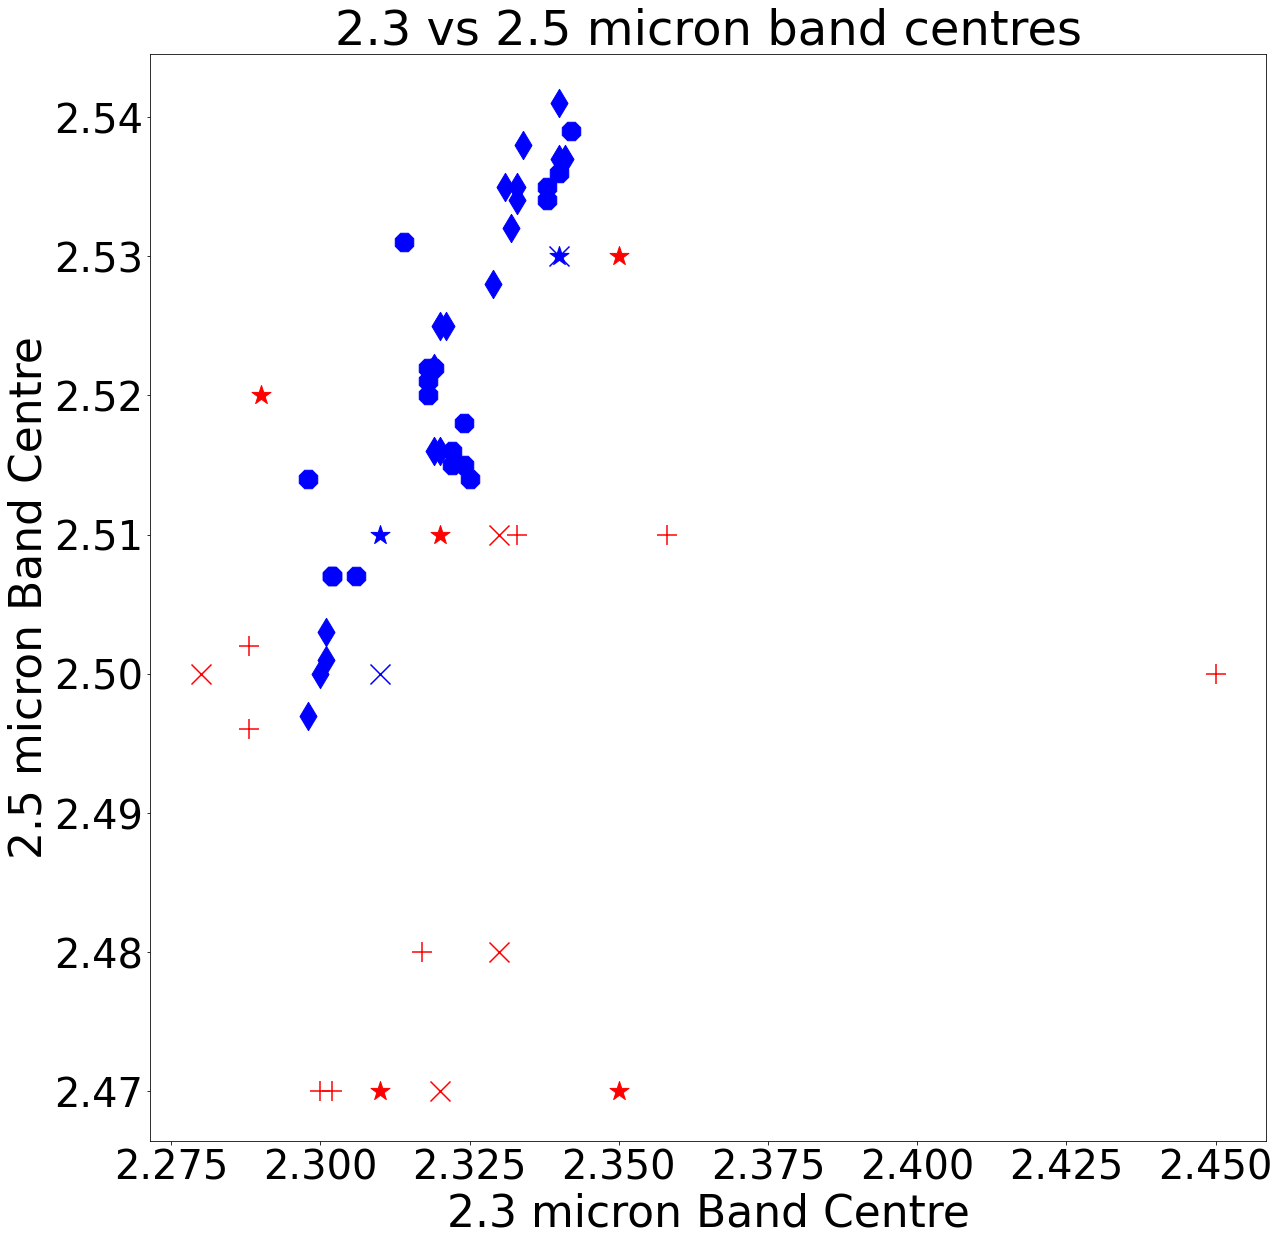

In [54]:
#create a figure and plot the four sets of points
plt.figure(figsize=(20,20))
plt.title("2.3 vs 2.5 micron band centres",fontsize=48)
plt.xlabel("2.3 micron Band Centre",fontsize=44)
plt.ylabel("2.5 micron Band Centre",fontsize=44)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)



#plot the bishop 2021 carbonates
plt.scatter(bishopCarbonate23BandCentre,
            bishopCarbonate25BandCentre,
            s=bishop2021MarkerSize,
            color=carbonateColor,
            marker=bishop2021Marker,
            label="Bishop et al. (2021) Carbonates")
#plot the gaffey 1987 carbontes
plt.scatter(gaffeyCarbonate23BandCentre,
            gaffeyCarbonate25BandCentre,
            s=gaffeyMarkerSize,
            color=carbonateColor,
            marker=gaffeyMarker,
            label="Gaffey (1987) Carbonates")
#plot the library carbonates
plt.scatter(libraryCarbonate23BandCentre,
            libraryCarbonate25BandCentre,
            s=libraryMarkerSize,
            color=carbonateColor,
            marker=libraryMarker,
            label="Viviano-Beck et al. (2014) Lab Carbonates")
#plot the CRISM carbonates
plt.scatter(crismCarbonate23BandCentre,
            crismCarbonate25BandCentre,
            s=crismMarkerSize,
            color=carbonateColor,
            marker=crismMarker,
            label="Viviano-Beck et al. (2014) CRISM Carbonates")
#plot the library phyllosilicates
plt.scatter(libraryPhyllosilicate23BandCentre,
            libraryPhyllosilicate25BandCentre,
            s=libraryMarkerSize,
            color=phyllosilicateColor,
            marker=libraryMarker,
            label="Viviano-Beck et al. (2014) Lab Phyllosilicates")
#plot the CRISM phyllosilicates
plt.scatter(crismPhyllosilicate23BandCentre,
            crismPhyllosilicate25BandCentre,
            s=crismMarkerSize,
            color=phyllosilicateColor,
            marker=crismMarker,
            label="Viviano-Beck et al. (2014) CRISM Phyllosilicates")
#plot the Bishop 2009 phyllosilicates
plt.scatter(bishopPhyllosilicate23BandCentre,
            bishopPhyllosilicate25BandCentre,
            s=bishopMarkerSize,
            color=phyllosilicateColor,
            marker=bishopMarker,
            label="Bishop et al. (2009) Phyllosilicates")
'''#plot the Post 2000 phyllosilicates
plt.scatter(postPhyllosilicate23BandCentre,
            postPhyllosilicate25BandCentre,
            s=postMarkerSize,
            color=phyllosilicateColor,
            marker=postMarker,
            label="Bishop et al.(2009) Phyllosilicates")'''

#plt.grid(which="both")
#plt.legend(loc="best",fontsize=48,framealpha=1)